# 0. LIBRERIAS



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. CARGA DE DATASET y generación de train y test

In [2]:
df1 = pd.read_excel('/content/df_2012_preproc_10s.xlsx', index_col="timestamp")
df2 = pd.read_excel('/content/df_2014_preproc_10s.xlsx', index_col="timestamp")
df3 = pd.read_excel('/content/df_2015_preproc_10s.xlsx', index_col="timestamp")

In [3]:
df_train = pd.concat([df1, df2], axis = 0)
df_test = df3

In [4]:
df_list_year = {'df_2012': df1, 'df_2014': df2, 'df_2015': df3}
df_list_train_test = {'df_train': df_train, 'df_test': df_test}

In [5]:
for name, data in df_list_year.items():
  df = data.copy()
  Bgn_normal = df[df['class'] == "Normal"].index[0]
  End_normal = df[df['class'] == "Normal"].index[-1]
  Bgn_transient = df[df['class'] == "Transitorio"].index[0]
  End_transient = df[df['class'] == "Transitorio"].index[-1]
  Bgn_FaultySS = df[df['class'] == "Falla"].index[0]
  End_FaultySS = df[df['class'] == "Falla"].index[-1]
  print(name, df.shape)
  print(f"Duración: Normal = {End_normal - Bgn_normal}, Transitorio = {End_transient-Bgn_transient}, Falla = {End_FaultySS-Bgn_FaultySS}")

df_2012 (23954, 8)
Duración: Normal = 1 days 04:33:00, Transitorio = 1 days 08:16:10, Falla = 0 days 05:42:40
df_2014 (31101, 8)
Duración: Normal = 0 days 11:22:10, Transitorio = 3 days 00:43:40, Falla = 0 days 02:17:10
df_2015 (16401, 8)
Duración: Normal = 0 days 14:35:50, Transitorio = 1 days 06:24:20, Falla = 0 days 00:32:50


In [6]:
#Tamaño y período de tiempo de train test

print("Período de datos train:", df_train.shape)
print("Período de datos train:", df1.index[-1] - df1.index[0] + df2.index[-1] - df2.index[0])

print("Período de datos test:", df_test.shape)
print("Período de datos test:", df_test.index[-1] - df_test.index[0])

Período de datos train: (55055, 8)
Período de datos train: 6 days 08:55:30
Período de datos test: (16401, 8)
Período de datos test: 1 days 21:33:20


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55055 entries, 2012-06-01 17:50:20 to 2014-11-21 10:28:40
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   P-JUS-CKP  55055 non-null  float64
 1   P-MON-CKP  55055 non-null  float64
 2   P-PDG      55055 non-null  float64
 3   P-TPT      55055 non-null  float64
 4   T-MON-CKP  55055 non-null  float64
 5   T-PDG      55055 non-null  float64
 6   T-TPT      55055 non-null  float64
 7   class      55055 non-null  object 
dtypes: float64(7), object(1)
memory usage: 3.8+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16401 entries, 2015-06-14 03:57:10 to 2015-06-16 01:30:30
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   P-JUS-CKP  16401 non-null  float64
 1   P-MON-CKP  16401 non-null  float64
 2   P-PDG      16401 non-null  float64
 3   P-TPT      16401 non-null  float64
 4   T-MON-CKP  16401 non-null  float64
 5   T-PDG      16401 non-null  float64
 6   T-TPT      16401 non-null  float64
 7   class      16401 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [9]:
df_train.describe()

,P-JUS-CKP,P-MON-CKP,P-PDG,P-TPT,T-MON-CKP,T-PDG,T-TPT
count,55055.000000,55055.000000,55055.000000,55055.000000,55055.000000,55055.000000,55055.000000
mean,12.191985,21.510740,149.259722,88.883143,21.280055,77.699177,22.702856
std,4.395669,17.104695,20.362139,19.159139,7.542003,24.489292,20.382885
min,0.821110,4.693962,51.766899,60.728050,2.699672,56.275284,4.253785
25%,9.407565,8.779085,136.012785,74.476320,14.238138,68.338684,4.798526
50%,11.668366,12.540147,147.863850,90.443090,23.576060,70.045717,5.615904
75%,14.355747,34.883934,167.104320,90.629045,25.819110,70.230411,47.343055
max,55.782973,89.216577,178.834900,241.282850,36.681890,177.800690,55.007022


In [10]:
df_test.describe()

,P-JUS-CKP,P-MON-CKP,P-PDG,P-TPT,T-MON-CKP,T-PDG,T-TPT
count,16401.000000,16401.000000,16401.000000,16401.000000,16401.000000,16401.000000,16401.000000
mean,8.059007,12.958824,142.019812,69.667539,23.391961,94.352321,23.789643
std,5.989157,8.261632,30.151149,0.741630,3.161500,35.665751,23.208772
min,-0.573488,-0.094141,59.240287,67.802768,6.496836,68.285540,3.616599
25%,1.877585,4.939462,125.704090,69.233840,21.490560,68.913137,5.459158
50%,9.007066,14.730008,145.287000,69.671834,24.281020,70.381301,5.599616
75%,13.436910,18.110707,167.181460,70.390963,25.014019,116.727771,53.144810
max,23.524961,56.062407,176.187860,71.001280,32.796604,177.380010,53.961709


In [11]:
#Agrupación por variables
pressure_features = ['P-PDG', 'P-TPT', 'P-MON-CKP', 'P-JUS-CKP']
temp_features = ['T-PDG', 'T-TPT', 'T-MON-CKP']

## 2. EDA Análisis univariado

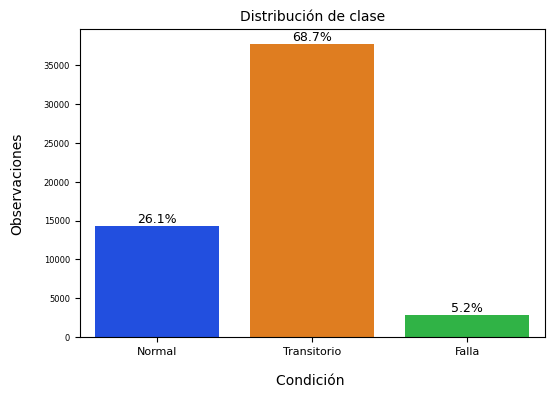

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(6,4))

# Create the countplot
ax = sns.countplot(x="class", data=df_train, palette = 'bright', hue='class', legend=False)

# Calculate percentages and annotate
total = len(df_train["class"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size=9)

plt.xticks(size=8)
plt.yticks(size=6)

plt.title('Distribución de clase',size=10)
plt.ylabel('Observaciones', size=10)
plt.xlabel('Condición ',size=10)
ax.xaxis.set_label_coords(0.5, -.12)
ax.yaxis.set_label_coords(-0.12, 0.5)
#ax.set_xlabel('Condición', size=10, loc='center')
plt.show()

plt.show()

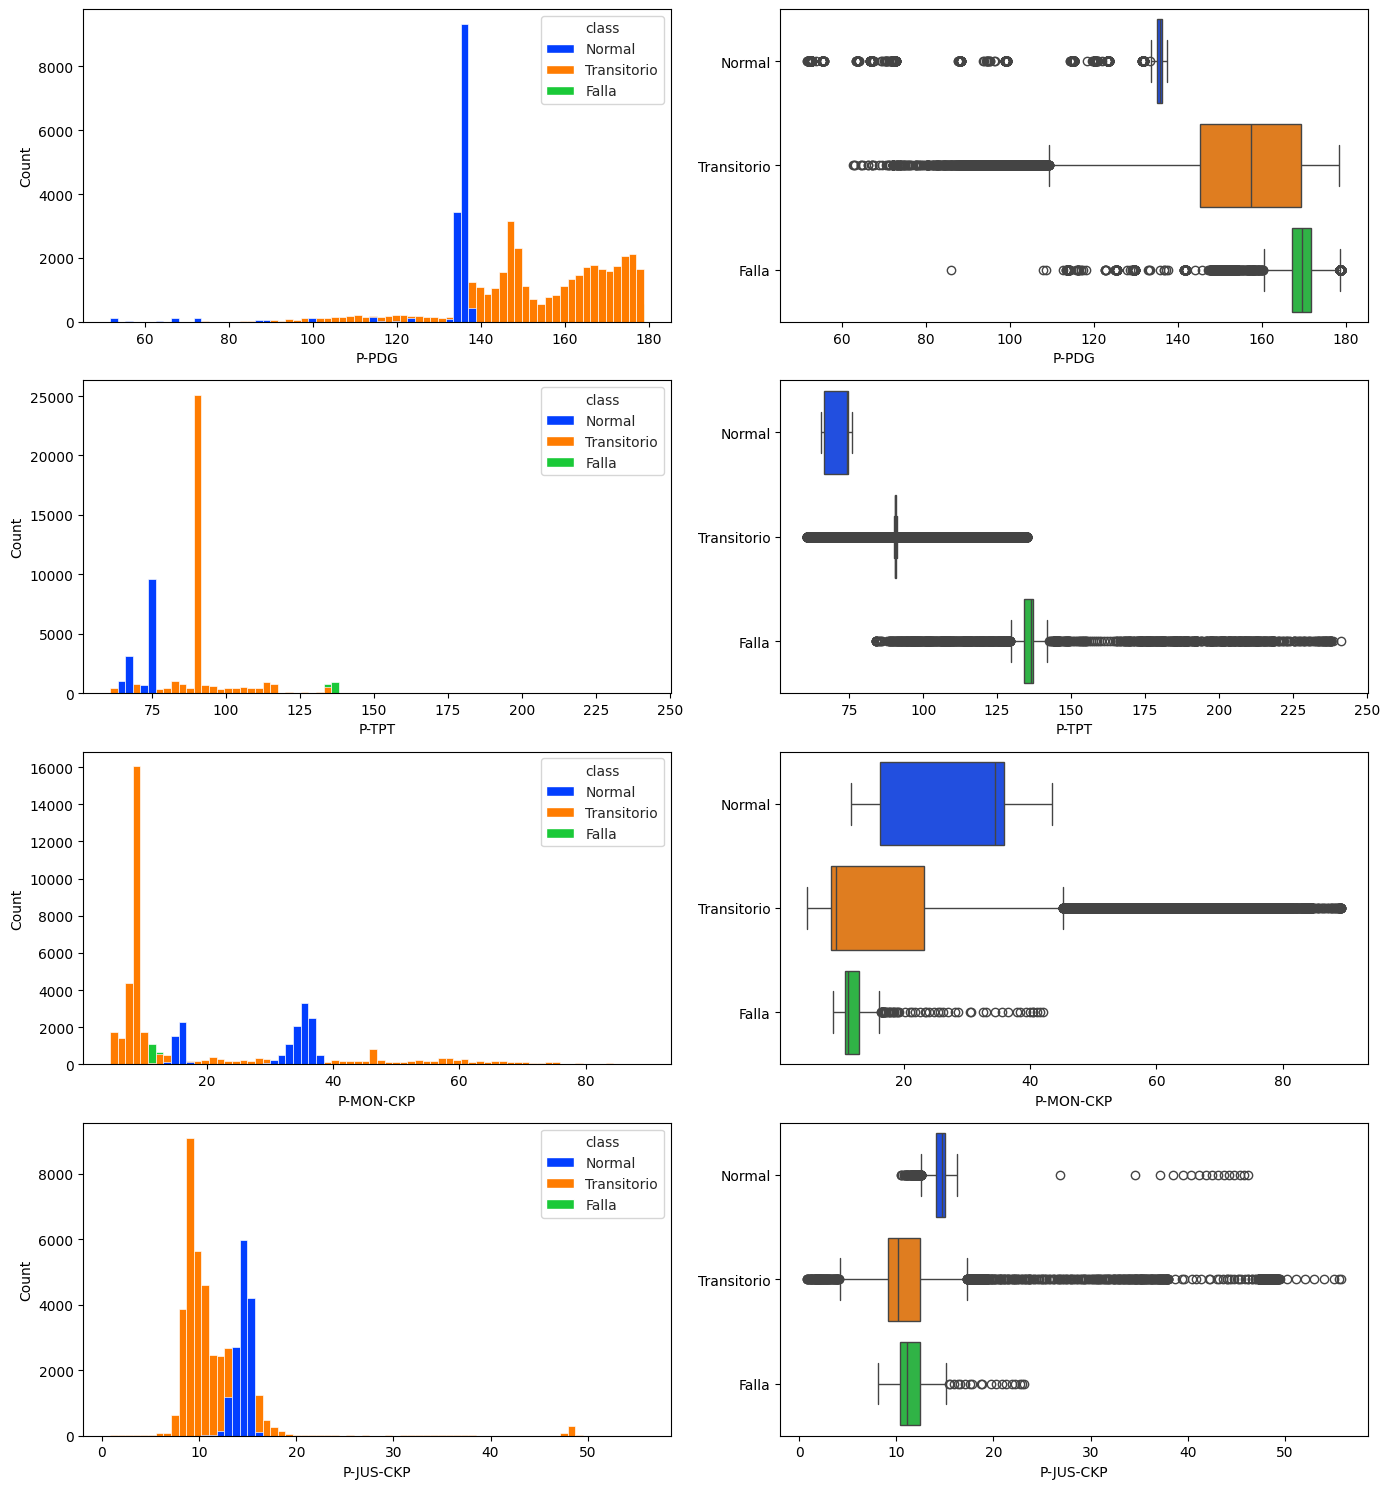

In [13]:
# distribución de variables por grupo
features= pressure_features
fig, ax = plt.subplots(figsize=(14,15),ncols=2, nrows=len(features))
sns.set_style(style='white')
custom_colors = ['red', 'green', 'black']
hue_order = ["Normal", "Transitorio", "Falla"]

i=0
for feature in features:

  ax1 = sns.histplot(data=df_train, x=feature, hue="class", kde=False, ax=ax[i][0], palette="bright", hue_order=hue_order, legend=True, alpha=1, bins=70)
  ax2 = sns.boxplot(x=feature, y='class', data=df_train, ax=ax[i][1], hue = 'class', palette='bright')
  ax2.set_ylabel('')

  i+=1

plt.tight_layout()
plt.show()

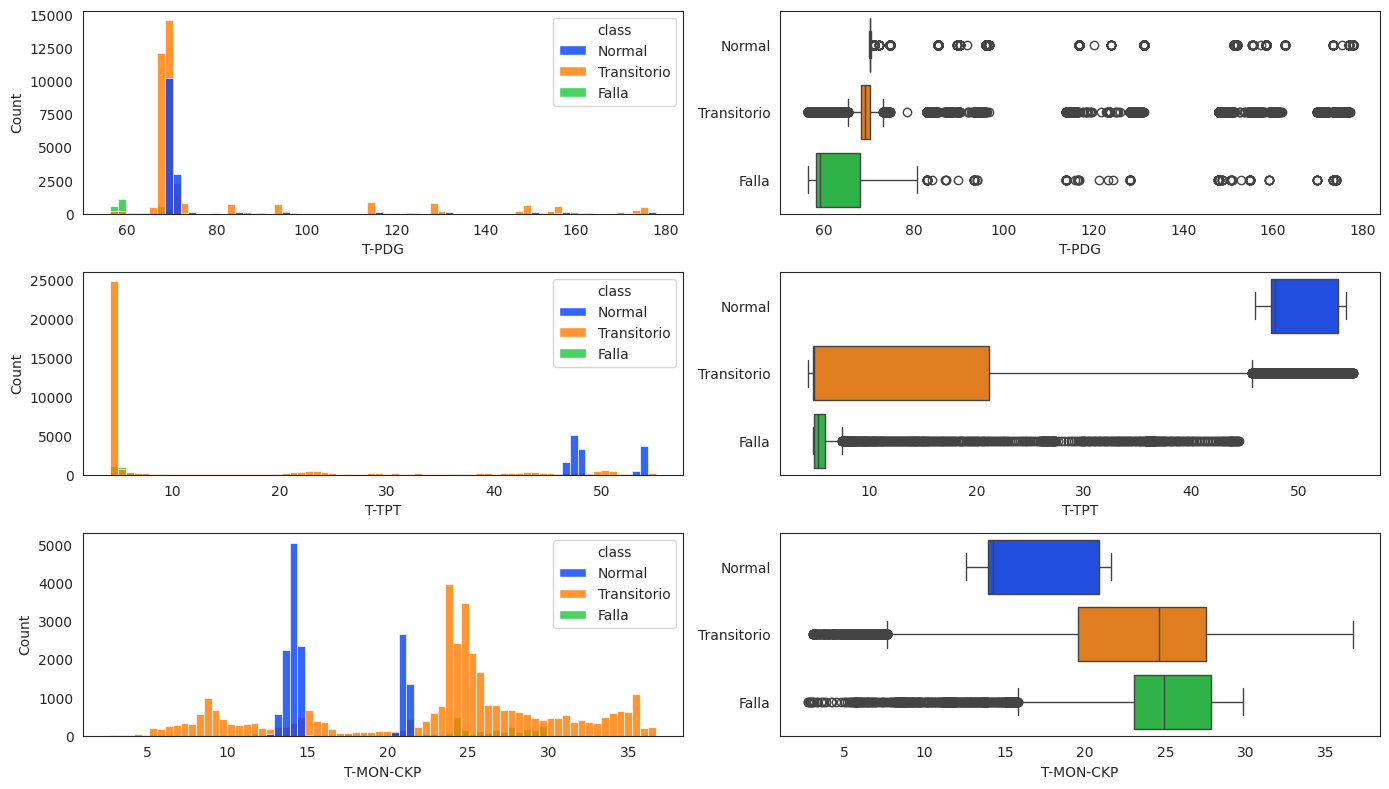

In [14]:
features= temp_features
fig, ax = plt.subplots(figsize=(14,8),ncols=2, nrows=len(features))
sns.set_style(style='white')
custom_colors = ['red', 'green', 'black']
hue_order = ["Normal", "Transitorio", "Falla"]

i=0
for feature in features:
  ax1 = sns.histplot(data=df_train, x=feature, hue="class", kde=False, ax=ax[i][0], palette="bright", hue_order=hue_order, legend=True, alpha=0.8, bins = 70)
  ax2 = sns.boxplot(x=feature, y='class', data=df_train, ax=ax[i][1], hue = 'class', palette='bright')
  ax2.set_ylabel('')

  i+=1

plt.tight_layout()
plt.show()

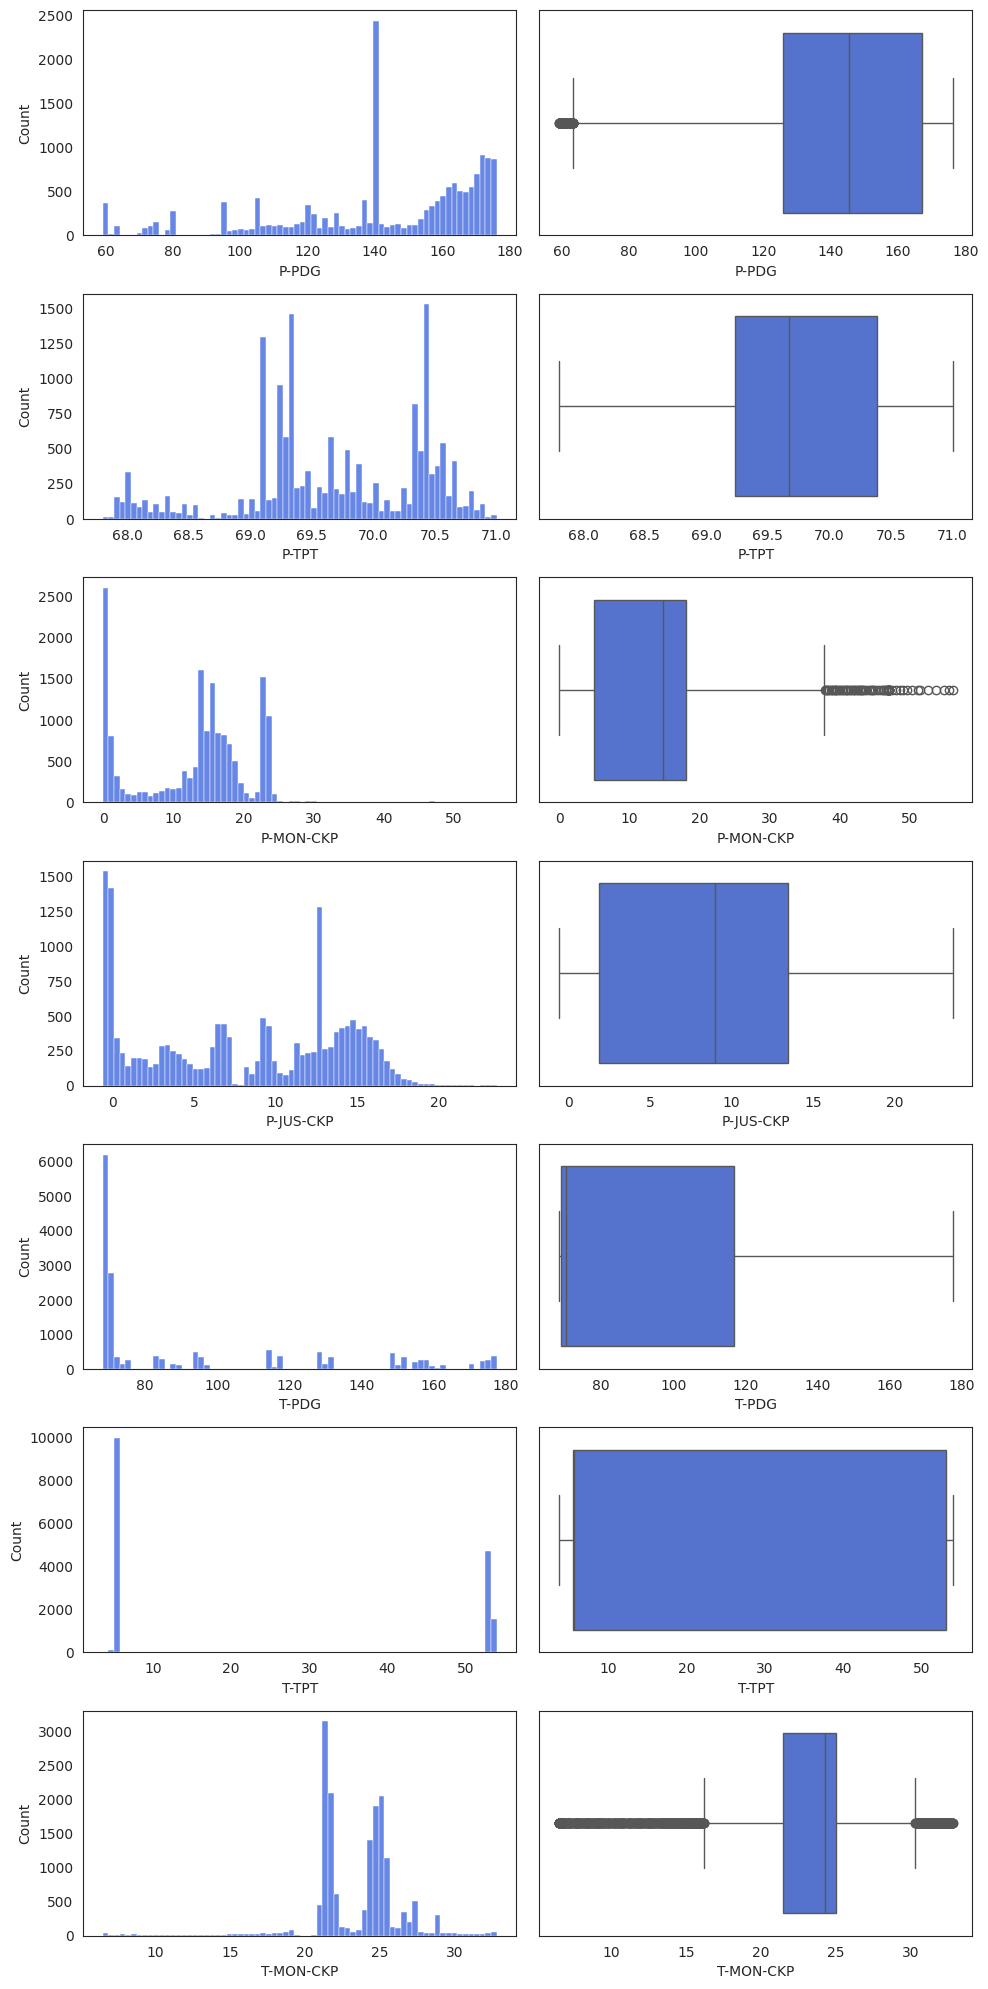

In [15]:
# EDA univariado en test
features= pressure_features + temp_features
fig, ax = plt.subplots(figsize=(10,20),ncols=2, nrows=len(features))
sns.set_style(style='white')
i=0
for feature in features:
  ax1 = sns.histplot(data=df_test, x=feature, kde=False, ax=ax[i][0], legend=True, color = 'royalblue', alpha=0.8, bins = 70)
  ax2 = sns.boxplot(data=df_test, x=feature, ax=ax[i][1], color = 'royalblue')
  ax2.set_ylabel('')

  i+=1

plt.tight_layout()
plt.show()

In [16]:
#Mediana por grupos
df_train.groupby('class')[pressure_features+temp_features].median()


,P-PDG,P-TPT,P-MON-CKP,P-JUS-CKP,T-PDG,T-TPT,T-MON-CKP
class,,,,,,,
Falla,169.66421,136.497180,11.204626,11.106820,59.031293,5.258084,24.943471
Normal,135.72910,74.080485,34.468218,14.666532,70.100965,47.800530,14.283851
Transitorio,157.49545,90.536063,9.250445,10.135189,69.110852,4.809474,24.601460


In [17]:
#Media por grupos
df_train.groupby('class')[pressure_features+temp_features].mean()

,P-PDG,P-TPT,P-MON-CKP,P-JUS-CKP,T-PDG,T-TPT,T-MON-CKP
class,,,,,,,
Falla,166.816810,142.778522,11.765646,11.221413,68.255141,8.662643,23.597675
Normal,132.312039,71.969444,29.550452,14.525141,74.651733,49.308904,16.049561
Transitorio,154.365594,91.206574,19.196537,11.378826,79.577677,13.656564,23.092199


## 3. EDA Análisis multivariado

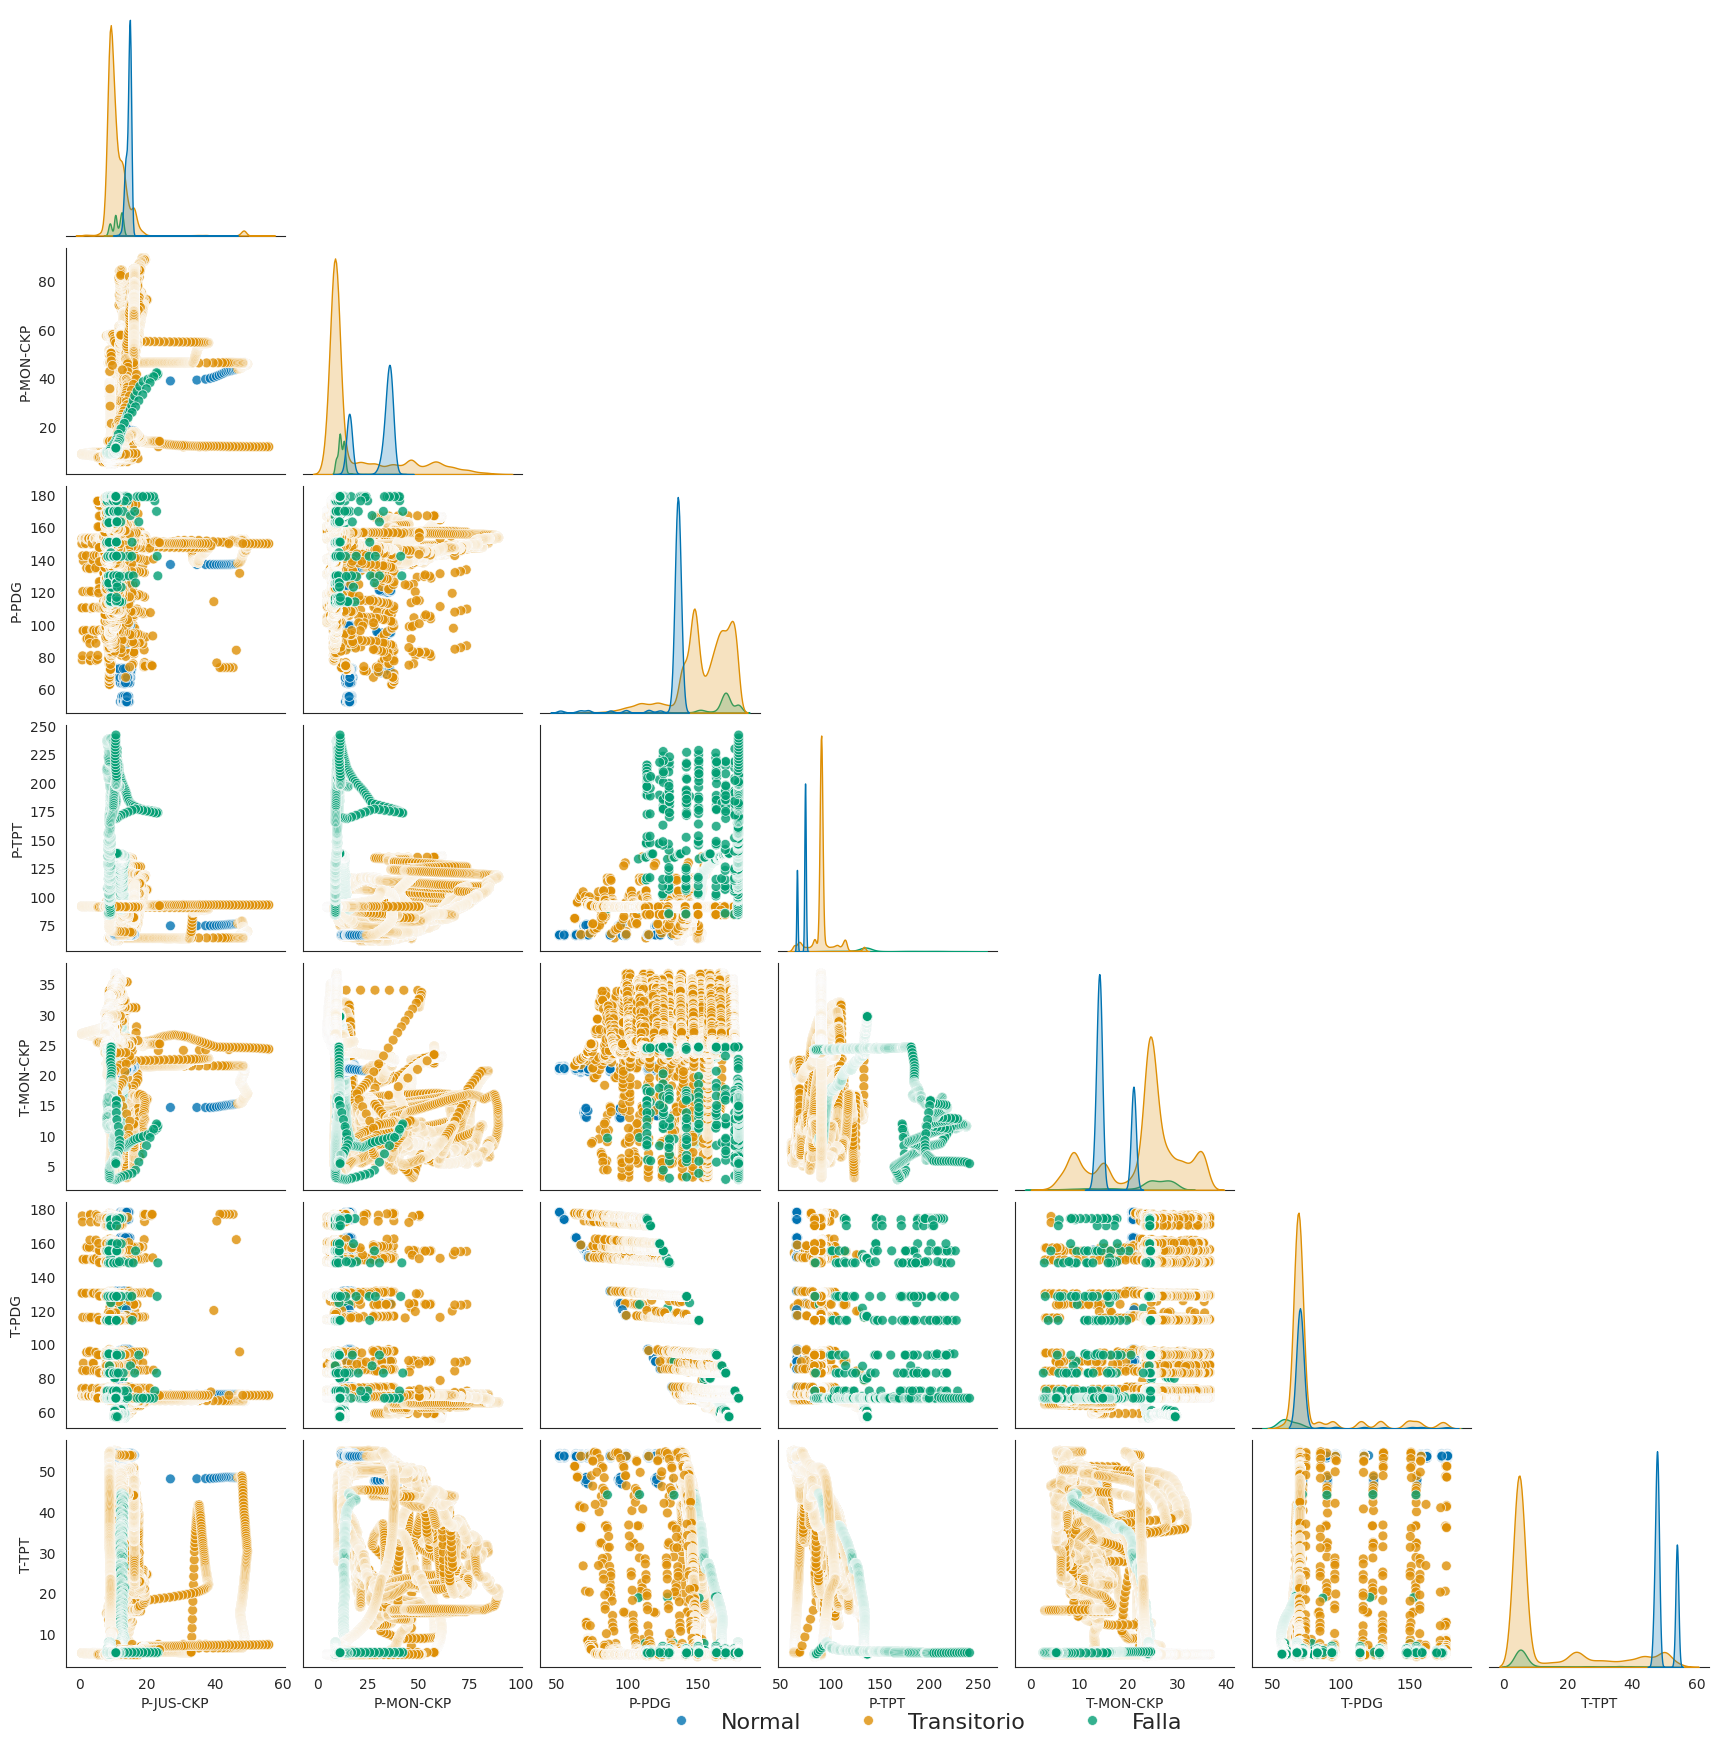

In [18]:
import seaborn
import matplotlib.pyplot as plt
#df_train_sample = df_train.sample(frac=0.1, random_state=42)

g = seaborn.pairplot(df_train, hue ='class', corner=True, palette='colorblind', plot_kws={'s': 50, 'alpha': 0.8})
handles = g._legend_data.values()
labels = g._legend_data.keys()

g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.01), frameon=False, fontsize=16)
g.legend.remove()
#ax.legend(loc='center', bbox_to_anchor=(0.5, -0.05), ncols=3)
plt.show()

In [19]:
#import seaborn
#import matplotlib.pyplot as plt

#g = seaborn.pairplot(df_train, hue ='class', corner=True, palette='deep', plot_kws={'s': 10, 'alpha': 0.3})
#handles = g._legend_data.values()
#labels = g._legend_data.keys()

#g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.01), frameon=False, fontsize=16)
#g.legend.remove()
#ax.legend(loc='center', bbox_to_anchor=(0.5, -0.05), ncols=3)
#plt.show()


{'P-JUS-CKP': 'mean', 'P-MON-CKP': 'mean', 'P-PDG': 'mean', 'P-TPT': 'mean', 'T-MON-CKP': 'mean', 'T-PDG': 'mean', 'T-TPT': 'mean', 'class': 'last'}


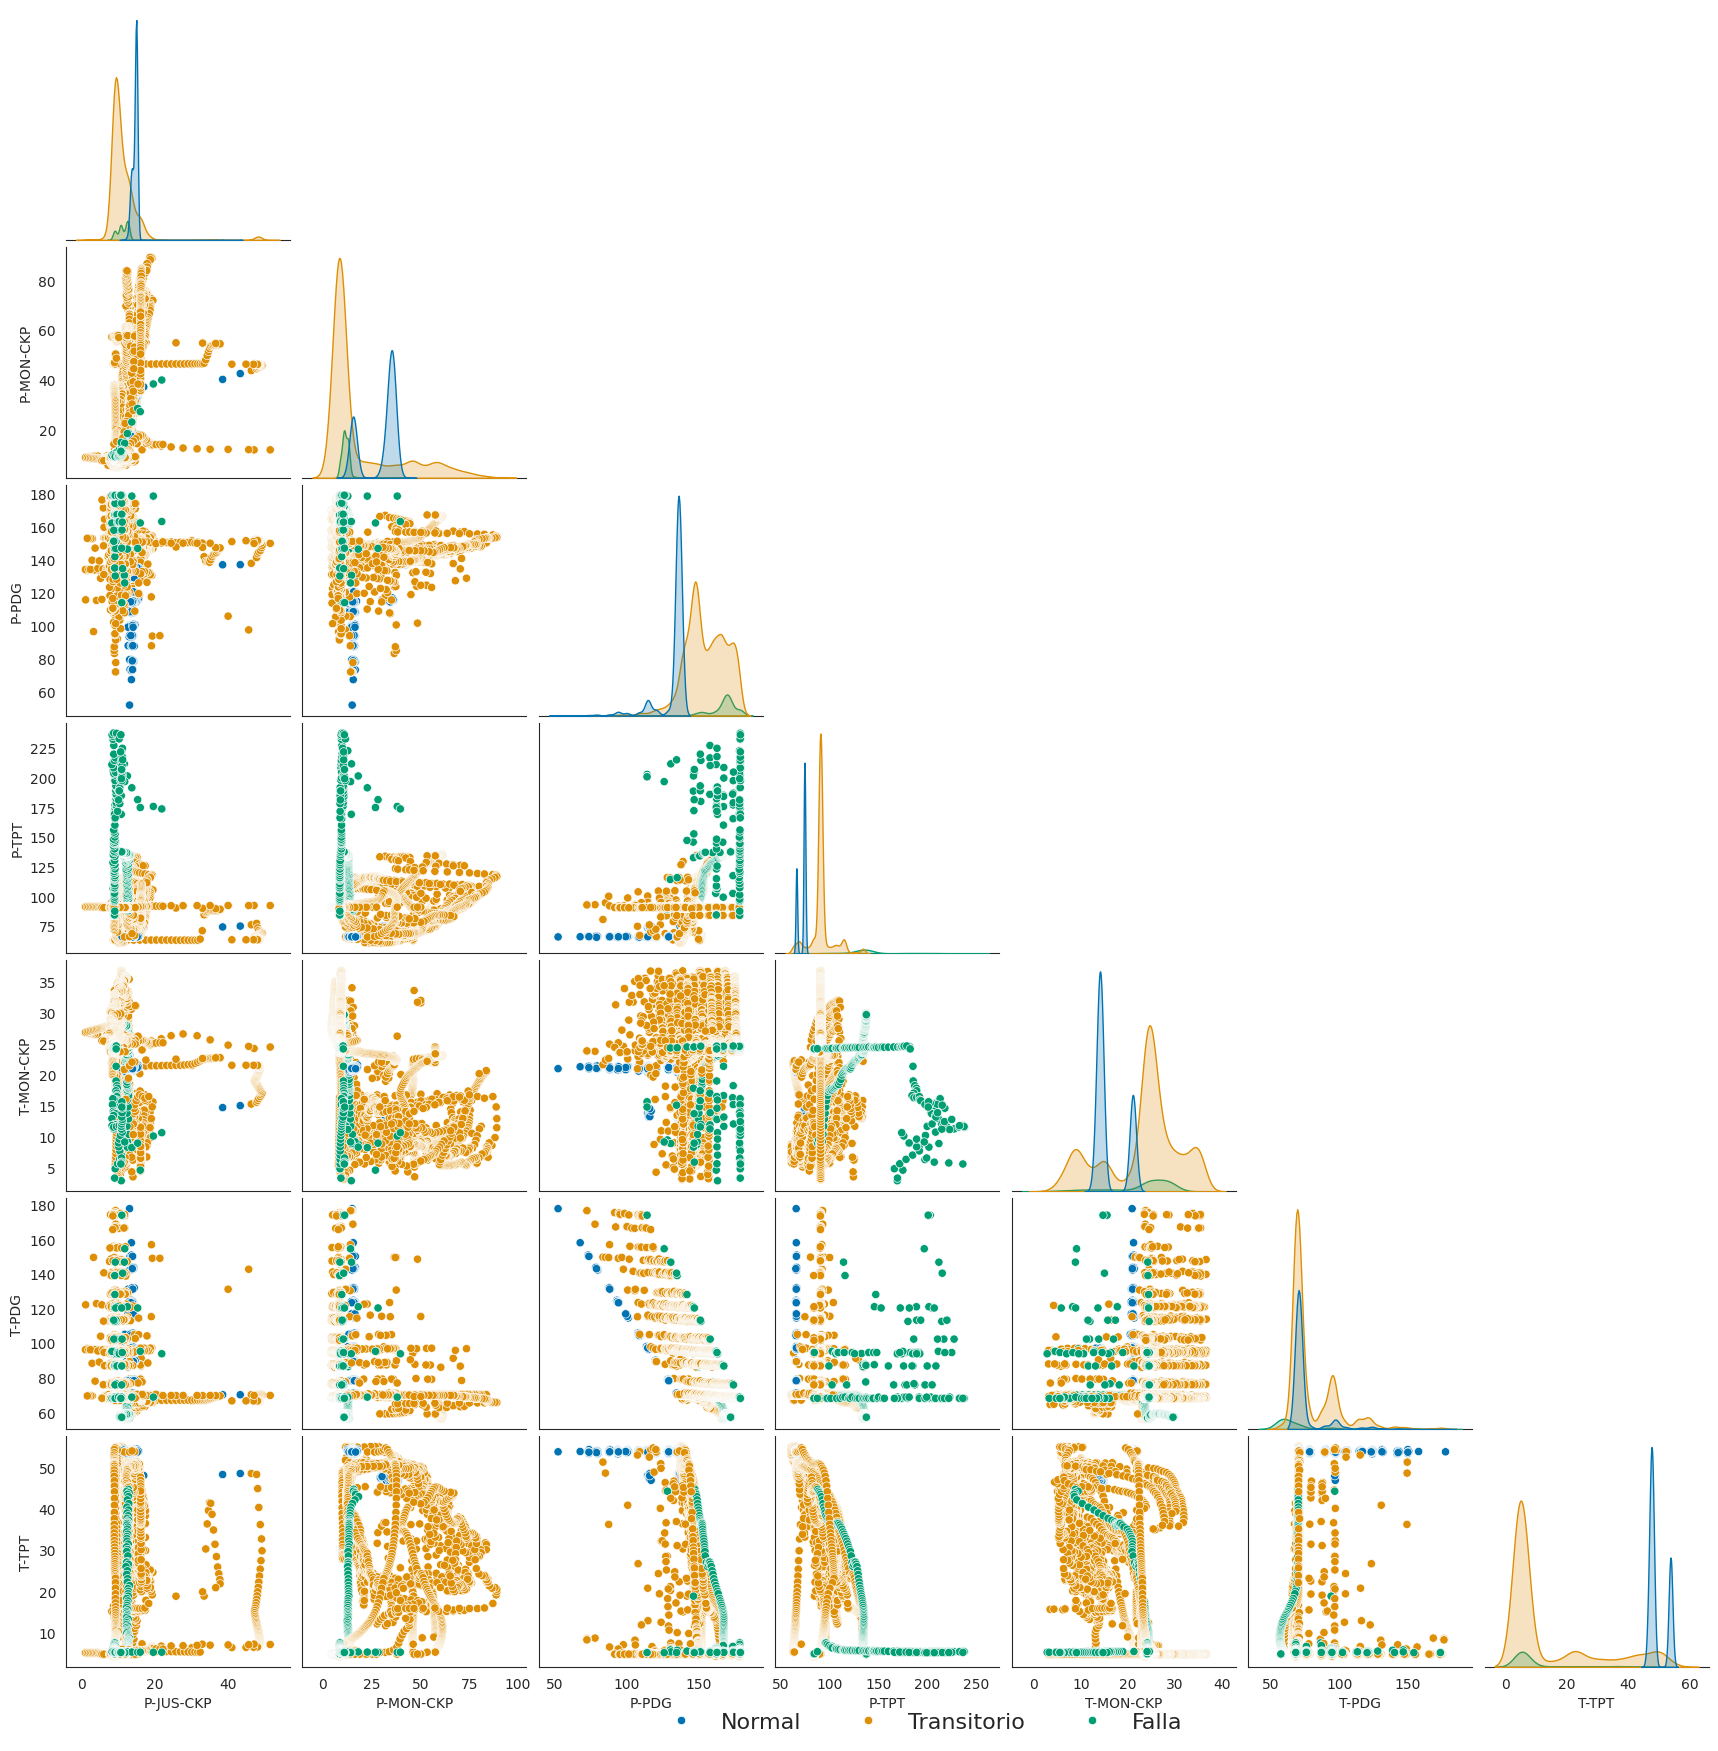

In [20]:
#Pairplot con resampling de 1 min
agg = dict.fromkeys(df_train.columns.difference(['class']), 'mean')
agg['class'] = 'last'
print(agg)

#Resampling con f= 1 min
df_2012_1min = df1.resample('1min').agg(agg)
df_2014_1min = df2.resample('1min').agg(agg)
df_2015_1min = df3.resample('1min').agg(agg)

df_train_1min = pd.concat([df_2012_1min, df_2014_1min], axis = 0)
df_test_1min = df_2015_1min

import seaborn
import matplotlib.pyplot as plt
g = seaborn.pairplot(df_train_1min, hue ='class', corner=True, palette='colorblind')
handles = g._legend_data.values()
labels = g._legend_data.keys()

g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.01), frameon=False, fontsize=16)
g.legend.remove()
#ax.legend(loc='center', bbox_to_anchor=(0.5, -0.05), ncols=3)
plt.show()

<Axes: >

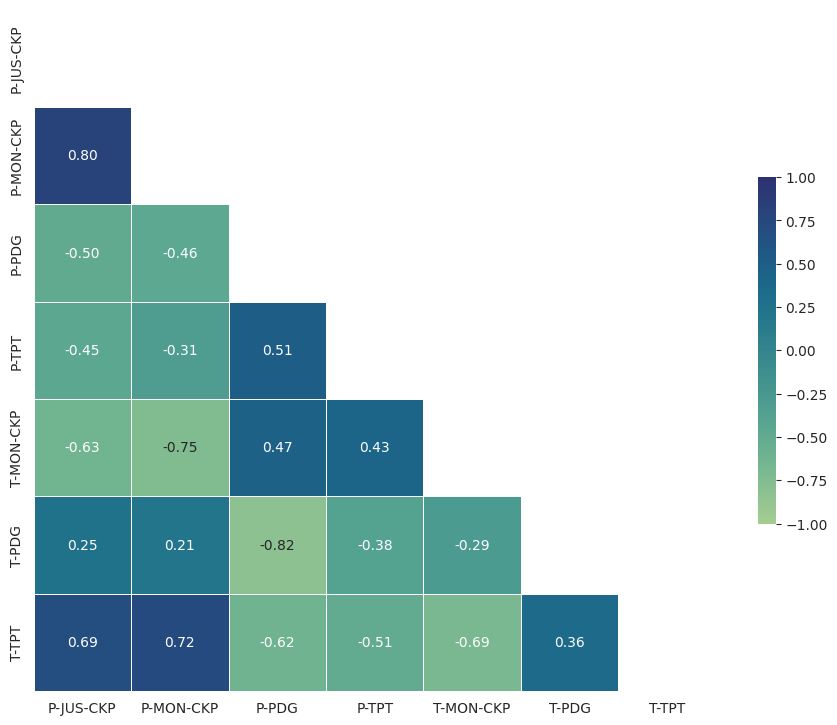

In [21]:
#Correlation Spearman in train
corr = df_train.corr(method='spearman', numeric_only=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(
    corr,          # The data to plot
    mask=mask,     # Mask some cells
    cmap='crest',     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=1,       # The maximum value of the legend. All higher vals will be same color
    vmin=-1,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5}, # Extra kwargs for the legend; in this case, shrink by 50%
    fmt=".2f"
)

In [22]:
df_train.groupby('class')[['P-MON-CKP','P-JUS-CKP']].corr(method='spearman')

P-MON-CKP  P-JUS-CKP
class                                      
Falla       P-MON-CKP   1.000000   0.903770
            P-JUS-CKP   0.903770   1.000000
Normal      P-MON-CKP   1.000000   0.819024
            P-JUS-CKP   0.819024   1.000000
Transitorio P-MON-CKP   1.000000   0.689301
            P-JUS-CKP   0.689301   1.000000

In [23]:
df_train.groupby('class')[['P-MON-CKP','T-TPT']].corr(method='spearman')

P-MON-CKP     T-TPT
class                                     
Falla       P-MON-CKP   1.000000  0.352714
            T-TPT       0.352714  1.000000
Normal      P-MON-CKP   1.000000 -0.670502
            T-TPT      -0.670502  1.000000
Transitorio P-MON-CKP   1.000000  0.652702
            T-TPT       0.652702  1.000000

In [24]:
df_train.groupby('class')[['P-JUS-CKP','T-TPT']].corr(method='spearman')

P-JUS-CKP     T-TPT
class                                     
Falla       P-JUS-CKP   1.000000  0.272566
            T-TPT       0.272566  1.000000
Normal      P-JUS-CKP   1.000000 -0.616438
            T-TPT      -0.616438  1.000000
Transitorio P-JUS-CKP   1.000000  0.511265
            T-TPT       0.511265  1.000000

In [25]:
df_train.groupby('class')[['T-PDG','P-PDG']].corr(method='spearman')

T-PDG     P-PDG
class                                
Falla       T-PDG  1.000000 -0.234548
            P-PDG -0.234548  1.000000
Normal      T-PDG  1.000000 -0.657095
            P-PDG -0.657095  1.000000
Transitorio T-PDG  1.000000 -0.842270
            P-PDG -0.842270  1.000000

In [26]:
df_train.groupby('class')[['P-MON-CKP','T-MON-CKP']].corr(method='spearman')

P-MON-CKP  T-MON-CKP
class                                      
Falla       P-MON-CKP   1.000000  -0.092925
            T-MON-CKP  -0.092925   1.000000
Normal      P-MON-CKP   1.000000  -0.362734
            T-MON-CKP  -0.362734   1.000000
Transitorio P-MON-CKP   1.000000  -0.579808
            T-MON-CKP  -0.579808   1.000000

In [27]:
df_train.groupby('class')[['T-PDG','P-PDG']].corr(method='spearman')

T-PDG     P-PDG
class                                
Falla       T-PDG  1.000000 -0.234548
            P-PDG -0.234548  1.000000
Normal      T-PDG  1.000000 -0.657095
            P-PDG -0.657095  1.000000
Transitorio T-PDG  1.000000 -0.842270
            P-PDG -0.842270  1.000000

In [28]:
df_train.groupby('class')[['P-MON-CKP','T-MON-CKP']].corr(method='spearman')

P-MON-CKP  T-MON-CKP
class                                      
Falla       P-MON-CKP   1.000000  -0.092925
            T-MON-CKP  -0.092925   1.000000
Normal      P-MON-CKP   1.000000  -0.362734
            T-MON-CKP  -0.362734   1.000000
Transitorio P-MON-CKP   1.000000  -0.579808
            T-MON-CKP  -0.579808   1.000000